Importing

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

Device Selection

In [2]:
device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else "cpu"

Basic Learnables

In [24]:
a = torch.tensor([1,2,3])
b = torch.ones((2,3))
c = torch.randn((3,2))

In [ ]:
x = torch.tensor([5,6,7])
# These array should match eachothers
# Addition and subtraction
print(a+x)
# Division
print(a/x)
# Modulo division
print(a//x)
# Element wise multiplication
print(a*x)

tensor([ 6,  8, 10])
tensor([0.2000, 0.3333, 0.4286])
tensor([0, 0, 0])


In [ ]:
# Matrix Multiplication [size(x, y)*size(y,z)]
b@c

tensor([ 5, 12, 21])

Dataset Learables

In [3]:
training_data = datasets.MNIST(root=".", train=True, transform=ToTensor(), download=True)
testing_data = datasets.MNIST(root=".", train=False, transform=ToTensor(), download=True)

In [4]:
batch_size = 64
train_dataloader = DataLoader(training_data,batch_size, shuffle=True)
test_dataloader= DataLoader(testing_data,batch_size, shuffle=False)

In [34]:
print(train_dataloader.batch_size)

32


In [35]:
images, labels = next(iter(train_dataloader))
print("Batch shape:", images.shape)
print("Labels:", labels[:10])

Batch shape: torch.Size([32, 1, 28, 28])
Labels: tensor([2, 8, 3, 6, 3, 0, 9, 1, 2, 5])


Viewing a image

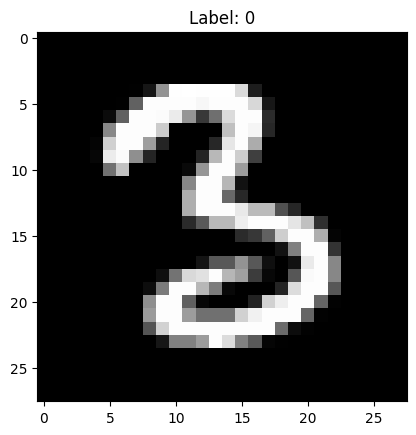

In [19]:
import matplotlib.pyplot as plt

plt.imshow(images[1].squeeze(), cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.show()

In [36]:
print(images[0].shape)
print(images[0].squeeze().shape)
print(labels[1].item())

torch.Size([1, 28, 28])
torch.Size([28, 28])
8


ML model defining

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  
        )
    
    def forward(self, inp):
        inp = self.flatten(inp)
        logits = self.layers(inp)
        return logits

In [6]:
model = MLP().to(device)
print(model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Loss & Optimizer

In [7]:
from torch import optim

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Model Training

In [9]:
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in  train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        out = model(images)
        loss = criterion(out, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() 

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss}")



Epoch 1/5, Loss: 268.8175250478089
Epoch 2/5, Loss: 102.00540518853813
Epoch 3/5, Loss: 68.39991289307363
Epoch 4/5, Loss: 49.70869356463663
Epoch 5/5, Loss: 37.016903385403566


Accuracy Evaluation

In [11]:
model.eval()
correct, tot = 0,0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        out = model(images)
        _, pred = torch.max(out, dim=1)
        correct += (pred == labels).sum().item()
        tot += labels.size(0)

In [12]:

print(f"MNIST Accuracy: {correct/tot*100:.2f}%")

MNIST Accuracy: 97.89%
